## GMM 모델 적용 예시(iris 데이터)

In [2]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data = iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [4]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(iris.data)

irisDF['gmm_cluster'] = gmm_labels

print(irisDF.groupby('target')['gmm_cluster'].value_counts())

target  gmm_cluster
0       1              50
1       2              45
        0               5
2       0              50
Name: gmm_cluster, dtype: int64


In [5]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


## 초등 학생별 수준 군집화

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/강의자료/머신러닝기초/4일차_차원축소와군집화

/content/drive/MyDrive/강의자료/머신러닝기초/4일차_차원축소와군집화


```python
middle1_score_df = pd.read_csv('./datasets/중1_밀크T중학_AI진단평가_개인별전과목점수.csv',index_col=0)
```

In [5]:
middle1_score_df = pd.read_csv('./datasets/중1_밀크T중학_AI진단평가_개인별전과목점수.csv',index_col=0)
middle1_score_df

,시험명,전체,국어,영어,수학,과학,사회,역사,평균
0,AI진단평가,173,22.0,65.0,41.0,30.0,15.0,NaN,34.6
1,AI진단평가,47,47.0,0.0,0.0,0.0,0.0,NaN,9.4
2,AI진단평가,68,68.0,0.0,0.0,0.0,0.0,NaN,13.6
3,AI진단평가,324,68.0,86.0,57.0,15.0,53.0,45.0,54.0
4,AI진단평가,312,93.0,93.0,57.0,46.0,23.0,NaN,62.4
...,...,...,...,...,...,...,...,...,...
3524,AI진단평가,170,47.0,29.0,41.0,38.0,15.0,NaN,34.0
3525,AI진단평가,101,61.0,40.0,0.0,0.0,0.0,NaN,20.2
3526,AI진단평가,293,79.0,93.0,23.0,45.0,53.0,NaN,58.6
3527,AI진단평가,326,58.0,72.0,32.0,82.0,82.0,NaN,65.2


```python
middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()
```

In [6]:
middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

,국어,영어,수학,과학,사회,역사
3,68.0,86.0,57.0,15.0,53.0,45.0
10,79.0,93.0,46.0,30.0,45.0,15.0
13,93.0,100.0,48.0,56.0,63.0,100.0
23,100.0,100.0,88.0,61.0,90.0,33.0
32,93.0,100.0,65.0,53.0,45.0,90.0
...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0
2014,65.0,58.0,63.0,0.0,0.0,0.0
2349,54.0,79.0,51.0,90.0,90.0,71.0
3165,47.0,93.0,55.0,30.0,100.0,71.0


```python
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()
```

In [7]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

In [9]:
# PCA 분석을 한번 해봄

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(input_data)
score_pca = pca.transform(input_data)
print(score_pca.shape)
```

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(input_data)
score_pca = pca.transform(input_data)
print(score_pca.shape)

(351, 2)


```python
print(pca.explained_variance_ratio_)
```

In [10]:
print(pca.explained_variance_ratio_)

[0.52882125 0.1496732 ]


```python
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
scoreDF_pca = pd.DataFrame(score_pca, columns=pca_columns)
scoreDF_pca.head(3)
```

In [11]:
# PCA 분석화된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
scoreDF_pca = pd.DataFrame(score_pca, columns=pca_columns)
scoreDF_pca.head(3)

,pca_component_1,pca_component_2
0,37.776471,17.448316
1,51.757373,0.920640
2,-21.036371,48.266700


```python
x_axis_data = scoreDF_pca['pca_component_1']
y_axis_data = scoreDF_pca['pca_component_2']
plt.scatter(x_axis_data, y_axis_data, marker='o')

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()
```

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


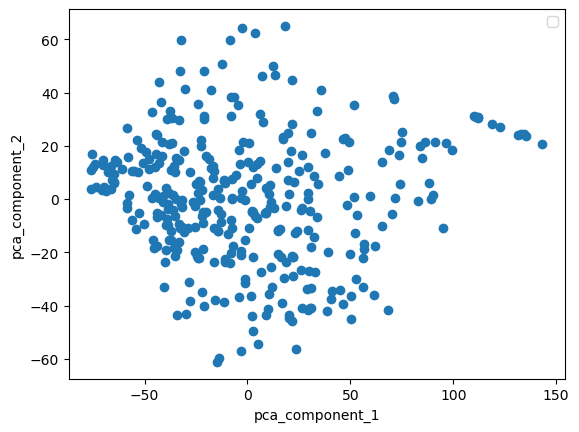

In [12]:
x_axis_data = scoreDF_pca['pca_component_1']
y_axis_data = scoreDF_pca['pca_component_2']
plt.scatter(x_axis_data, y_axis_data, marker='o')

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

```python
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(scoreDF_pca)

scoreDF_pca['gmm_cluster'] = gmm_labels
```

In [13]:
gmm = GaussianMixture(n_components=3, random_state = 42) # 학생들의 성적 수준을 상중하로 나눔
gmm_labels = gmm.fit_predict(scoreDF_pca)
gmm_labels

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0,
       0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [14]:
scoreDF_pca['gmm_cluster'] = gmm_labels

In [15]:
scoreDF_pca

,pca_component_1,pca_component_2,gmm_cluster
0,37.776471,17.448316,0
1,51.757373,0.920640,0
2,-21.036371,48.266700,0
3,-16.262894,-23.579302,0
4,-12.506128,50.820127,0
...,...,...,...
346,-52.736781,-5.040470,1
347,99.205888,18.381238,2
348,-23.243371,-0.324138,1
349,-2.795940,2.950650,0


```python
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_1']
    y_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()
```

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


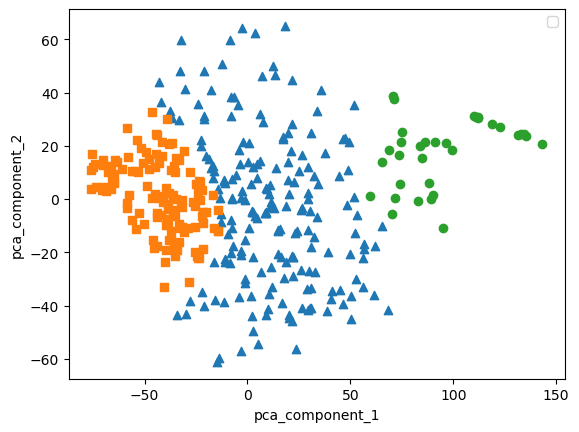

In [16]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_1']
    y_axis_data = scoreDF_pca[scoreDF_pca['gmm_cluster']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

### 결과 과목별 시각화 (레벨 확인)

```python
result = pd.concat([input_data.reset_index(),scoreDF_pca], axis=1)
result
```

In [17]:
result = pd.concat([input_data.reset_index(),scoreDF_pca], axis=1)
result

,index,국어,영어,수학,과학,사회,역사,pca_component_1,pca_component_2,gmm_cluster
0,3,68.0,86.0,57.0,15.0,53.0,45.0,37.776471,17.448316,0
1,10,79.0,93.0,46.0,30.0,45.0,15.0,51.757373,0.920640,0
2,13,93.0,100.0,48.0,56.0,63.0,100.0,-21.036371,48.266700,0
3,23,100.0,100.0,88.0,61.0,90.0,33.0,-16.262894,-23.579302,0
4,32,93.0,100.0,65.0,53.0,45.0,90.0,-12.506128,50.820127,0
...,...,...,...,...,...,...,...,...,...,...
346,1888,86.0,68.0,94.0,90.0,100.0,79.0,-52.736781,-5.040470,1
347,2014,65.0,58.0,63.0,0.0,0.0,0.0,99.205888,18.381238,2
348,2349,54.0,79.0,51.0,90.0,90.0,71.0,-23.243371,-0.324138,1
349,3165,47.0,93.0,55.0,30.0,100.0,71.0,-2.795940,2.950650,0


In [18]:
def ploting_score(df):
    f, ax = plt.subplots(2,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############
    
    # 각 클러스터 별 과목점수 ==> 막대그래프
    # 0번 클러스터
    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0,0])
    # 1번 클러스터
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0,0])
    # 2번 클러스터
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0,0])
    ax[0,0].set_title('Korean')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[0,1])
    ax[0,1].set_title('Math')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['영어'].tolist(),
                color="tomato",ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['영어'].tolist(),
                color="mediumorchid", ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['영어'].tolist(),
                color="gold", ax = ax[0,2])
    ax[0,2].set_title('English')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['사회'].tolist(),
                color="tomato", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['사회'].tolist(),
                color="mediumorchid", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['사회'].tolist(),
                color="gold", ax = ax[1,0])
    ax[1,0].set_title('Social')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['과학'].tolist(),
                color="tomato", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['과학'].tolist(),
                color="mediumorchid", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['과학'].tolist(),
                color="gold", ax = ax[1,1])
    ax[1,1].set_title('Science')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['역사'].tolist(),
                color="tomato", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['역사'].tolist(),
                color="mediumorchid", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['역사'].tolist(),
                color="gold", ax = ax[1,2])
    ax[1,2].set_title('History')
    ax[1,2].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

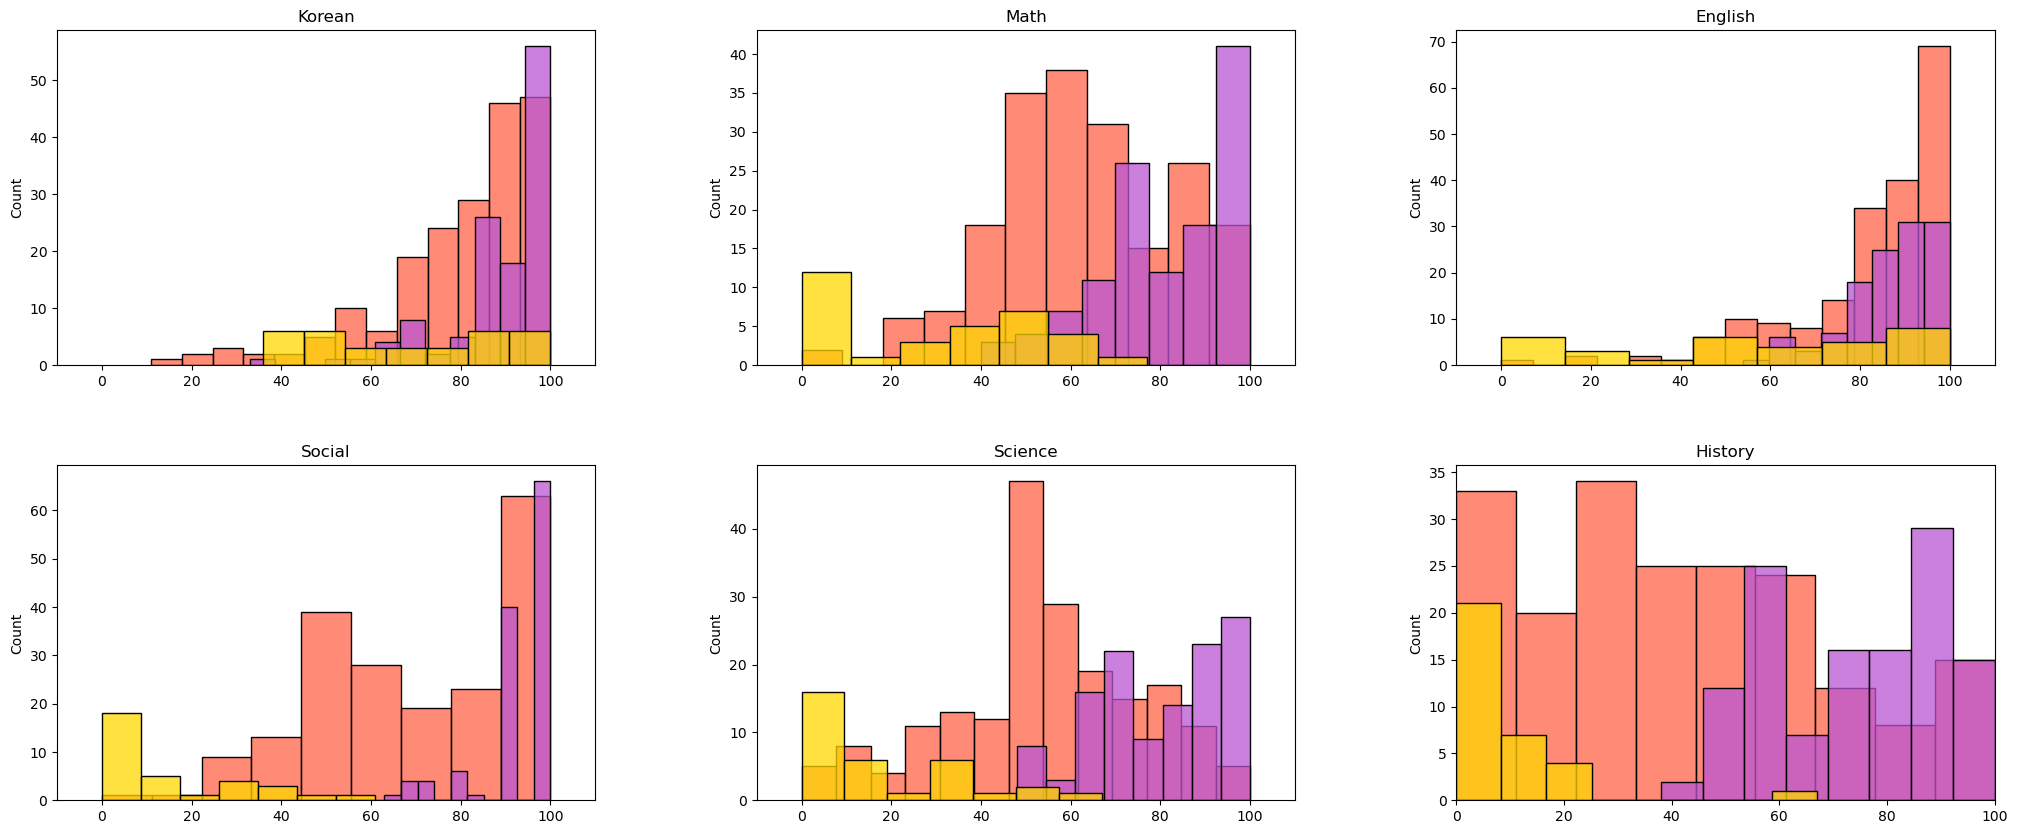

In [19]:
ploting_score(result)

In [20]:
# 수학과 과학 과목에 많이 영향을 받는구나 라고 생각할 수 있음 (가우시안 분포에 가깝게 분포가 됨)

### TODO : 학생별 평균점수의 분포 시각화

In [89]:
def ploting_score(df):    
#     f, ax = plt.subplots(1,1)
#     f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
    # 각 클러스터 별 과목점수 ==> 막대그래프
    # 0번 클러스터
    sns.histplot(df[df['gmm_cluster'] == 0]['평균점수'].tolist(),
                color="tomato")
    # 1번 클러스터
    sns.histplot(df[df['gmm_cluster'] == 1]['평균점수'].tolist(),
                color="mediumorchid")
    # 2번 클러스터
    sns.histplot(df[df['gmm_cluster'] == 2]['평균점수'].tolist(),
                color="gold")
    plt.title('score mean')
    plt.xlim(-10,110)
    plt.show()

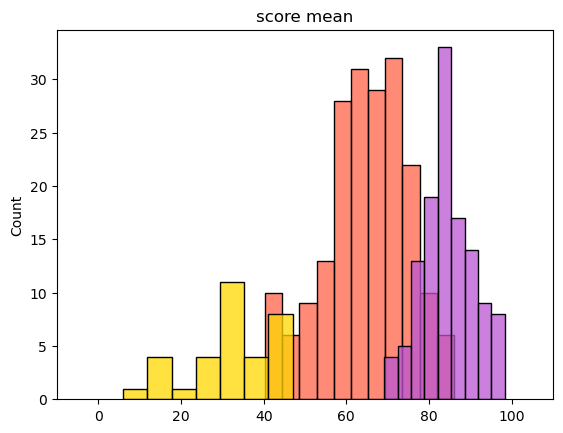

In [90]:
ploting_score(result)

In [60]:
len(result)

351

In [78]:
result.loc[0][1:7].sum()/6

54.0

In [84]:
for i in range(0,351):
    result['평균점수'][i] = result.loc[i][1:7].sum()/6

C:\Users\leah5\AppData\Local\Temp\ipykernel_4444\325660581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['평균점수'][i] = result.loc[i][1:7].sum()/6


In [85]:
result

,index,국어,영어,수학,과학,사회,역사,pca_component_1,pca_component_2,gmm_cluster,평균점수
0,3,68.0,86.0,57.0,15.0,53.0,45.0,37.776471,17.448316,0,54.000000
1,10,79.0,93.0,46.0,30.0,45.0,15.0,51.757373,0.920640,0,51.333333
2,13,93.0,100.0,48.0,56.0,63.0,100.0,-21.036371,48.266700,0,76.666667
3,23,100.0,100.0,88.0,61.0,90.0,33.0,-16.262894,-23.579302,0,78.666667
4,32,93.0,100.0,65.0,53.0,45.0,90.0,-12.506128,50.820127,0,74.333333
...,...,...,...,...,...,...,...,...,...,...,...
346,1888,86.0,68.0,94.0,90.0,100.0,79.0,-52.736781,-5.040470,1,86.166667
347,2014,65.0,58.0,63.0,0.0,0.0,0.0,99.205888,18.381238,2,31.000000
348,2349,54.0,79.0,51.0,90.0,90.0,71.0,-23.243371,-0.324138,1,72.500000
349,3165,47.0,93.0,55.0,30.0,100.0,71.0,-2.795940,2.950650,0,66.000000


In [86]:
result.groupby('gmm_cluster')['평균점수'].mean()

gmm_cluster
0    64.856293
1    84.581967
2    31.646465
Name: 평균점수, dtype: float64

In [82]:
# 인덱스 번호 346번 검산
86+68+94+90+100+79

517

In [83]:
517/6

86.16666666666667

In [91]:
# 평균 있는지 몰랐음...

In [93]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사','평균']].dropna()
input_data

,국어,영어,수학,과학,사회,역사,평균
3,68.0,86.0,57.0,15.0,53.0,45.0,54.000000
10,79.0,93.0,46.0,30.0,45.0,15.0,51.333333
13,93.0,100.0,48.0,56.0,63.0,100.0,76.666667
23,100.0,100.0,88.0,61.0,90.0,33.0,78.666667
32,93.0,100.0,65.0,53.0,45.0,90.0,74.333333
...,...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0,86.166667
2014,65.0,58.0,63.0,0.0,0.0,0.0,31.000000
2349,54.0,79.0,51.0,90.0,90.0,71.0,72.500000
3165,47.0,93.0,55.0,30.0,100.0,71.0,66.000000


In [94]:
result = pd.concat([input_data.reset_index(), scoreDF_pca], axis=1)

<Axes: ylabel='Count'>

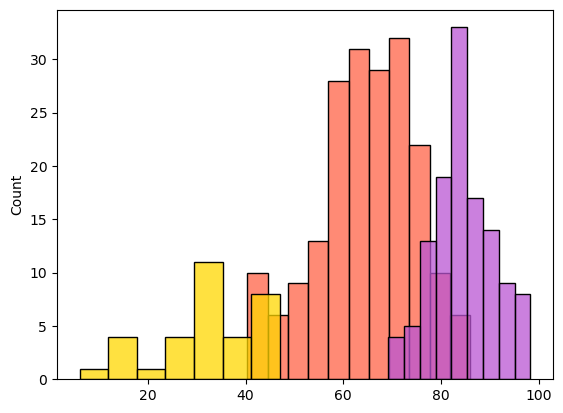

In [96]:
sns.histplot(result[result['gmm_cluster'] == 0]['평균'].tolist(),
            color="tomato")
sns.histplot(result[result['gmm_cluster'] == 1]['평균'].tolist(),
            color="mediumorchid")
sns.histplot(result[result['gmm_cluster'] == 2]['평균'].tolist(),
            color="gold")